### Data Cleanup and Preparation, Feature Engineering

In [619]:
%matplotlib inline

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')

data = pd.read_csv('TRAIN.csv')
data = data.rename(columns=lambda x: x.strip())   
data.shape

(1401, 16)

In [620]:
data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [621]:
data.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

Let's add some features that might further explain categorical data

In [622]:
data['Consistent competitor'] = (data['Most Loved Competitor network in in Month 1'
                                    ] == data['Most Loved Competitor network in in Month 2']).astype(int)
# if the competitor in month 1 and month 2 are the same, it gives a 1

data['Network Upgrade'] = 0

data.loc[(data['Network type subscription in Month 1'] == '2G') & 
              (data['Network type subscription in Month 2'] == '3G'), 'Network Upgrade'] = 1

data.loc[(data['Network type subscription in Month 1'] == '3G') & 
              (data['Network type subscription in Month 2'] == '2G'), 'Network Upgrade'] = -1
# if there is an upgrade in network, +1, downgrade: -1, else, 0

In [623]:
selected_data = data.iloc[:,1:]
selected_data.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Consistent competitor,Network Upgrade
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1401.000000,1401.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000,0.367595,0.014276
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179,0.482322,0.241594
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,-1.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000,0.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000,0.000000,0.000000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000,1.000000,0.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000,1.000000,1.000000


In [624]:
selected_data[selected_data['network_age'] < 0]

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Consistent competitor,Network Upgrade
490,-5.0,-0.17,857.1008,63.47,190.03,1.565901e+06,204.0,716.0,1240.0,1.0,3G,3G,ToCall,ToCall,1.0,1,0
916,-4.0,-0.13,2898.8240,25.10,1.25,3.058533e+05,642.0,0.0,82221.0,1.0,3G,3G,Mango,Weematel,1.0,0,0
1163,-2.0,-0.07,130.5780,94.85,1.25,2.195300e+00,7.0,150.0,1121.0,1.0,Other,Other,Uxaa,Uxaa,1.0,1,0


Text(0.5,1,'Correlation matrix')

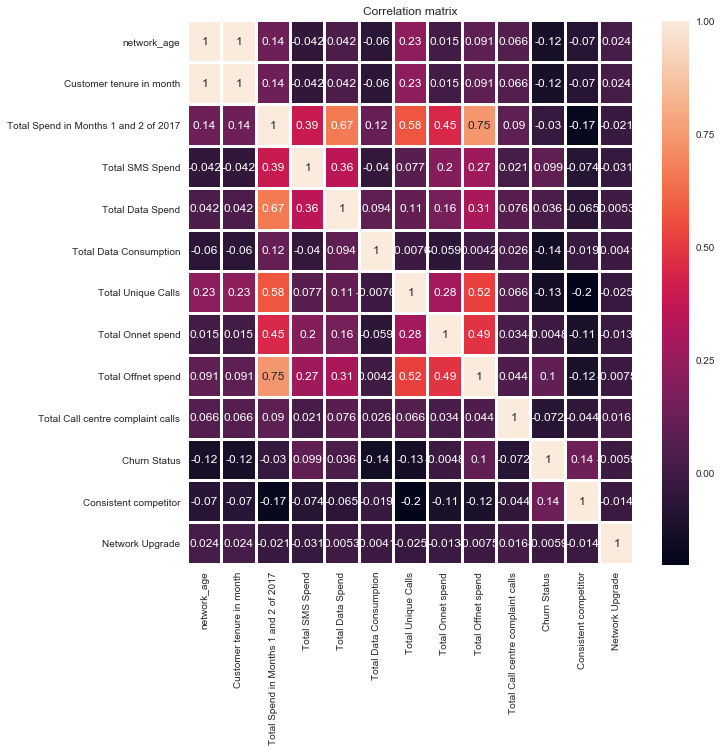

In [625]:
corr_matrix = selected_data.corr()
f, ax = plt.subplots(figsize=[10,10])
sns.heatmap(corr_matrix, linewidths=2, ax=ax, annot=True)    # annot parameter sets the values.
#as you can see in heatmap, longitude are latitude
ax.set_title('Correlation matrix')

Correlation matrix shows that network_age and customer tenure in a month seem to be saying the same thing. We will drop network_age

In [626]:
#plt.scatter(x='network_age', y='Customer tenure in month', data=selected_data, s = 10)

In [627]:
selected_data.drop('network_age', inplace=True, axis=1)

Text(0,0.5,'Total Data Spend')

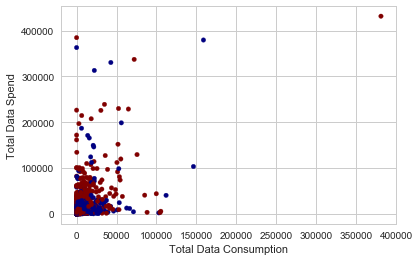

In [628]:
plt.scatter(x ='Total Onnet spend', y='Total Offnet spend', data = selected_data, s=20, c='Churn Status', cmap = 'jet')
plt.xlabel('Total Data Consumption')
plt.ylabel('Total Data Spend')
#plt.legend('on')

Text(0,0.5,'Total Onnet spend')

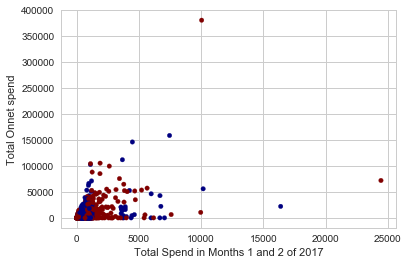

In [629]:
plt.scatter(x ='Total Spend in Months 1 and 2 of 2017', y='Total Onnet spend',data = selected_data, s=20, c='Churn Status', cmap = 'jet')
plt.xlabel('Total Spend in Months 1 and 2 of 2017')
plt.ylabel('Total Onnet spend')

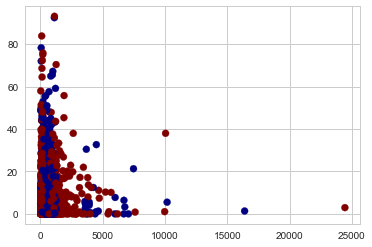

In [630]:
plt.scatter(selected_data['Total Spend in Months 1 and 2 of 2017'], 
            selected_data['Total Onnet spend']/selected_data['Total Spend in Months 1 and 2 of 2017'], c=selected_data['Churn Status'], cmap = 'jet')

In [631]:
network_month1_dummy = pd.get_dummies(selected_data['Network type subscription in Month 1'])
selected_data = selected_data.join(network_month1_dummy, rsuffix = "_1")
selected_data.drop('Network type subscription in Month 1', axis=1, inplace=True)

network_month2_dummy = pd.get_dummies(selected_data['Network type subscription in Month 2'])
selected_data = selected_data.join(network_month2_dummy, rsuffix = "_2")
selected_data.drop('Network type subscription in Month 2', axis=1, inplace=True)

competitor_month1_dummy = pd.get_dummies(selected_data['Most Loved Competitor network in in Month 1'])
selected_data = selected_data.join(competitor_month1_dummy, rsuffix = "_1")
selected_data.drop('Most Loved Competitor network in in Month 1', axis=1, inplace=True)

competitor_month2_dummy = pd.get_dummies(selected_data['Most Loved Competitor network in in Month 2'])
selected_data = selected_data.join(competitor_month2_dummy, rsuffix = "_2")
selected_data.drop('Most Loved Competitor network in in Month 2', axis=1, inplace=True)

In [632]:
selected_data['Churn Status'] = selected_data['Churn Status'].apply(lambda x: -1 if x==0 else 1)

In [633]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

train_data, cv_data = train_test_split(selected_data, test_size=0.3, random_state=42)

In [634]:
train_x = train_data.drop('Churn Status', axis=1)
train_y = train_data['Churn Status']

cv_x = cv_data.drop('Churn Status', axis=1)
cv_y = cv_data['Churn Status']

In [635]:
#train_x.to_csv('train_x.csv')
#train_x.isnull().any(axis=1)

In [636]:
### Examination of the csv file shows that there is a value with NaNs

train_x[train_x.isnull().any(axis=1)]

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [637]:
train_x.drop(1400, inplace=True)
train_y.drop(1400, inplace=True)

C:\Users\Emmanuel\Anaconda3\lib\site-packages\pandas\core\generic.py:2533: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


In [638]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()
std_scaler.fit(train_x)

#train_x_std = std_scaler.transform(train_x)
#cv_x_std = std_scaler.transform(cv_x)

train_x_std = train_x
cv_x_std = cv_x

In [639]:
selected_data.describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1401.000000,...,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.000714,...,0.144183,0.231263,0.099215,0.108494,0.072091,0.219843,0.045682,0.591720,0.036403,0.032834
std,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,1.000357,...,0.351400,0.421791,0.299057,0.311114,0.258731,0.414288,0.208868,0.491691,0.187357,0.178265
min,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [640]:
selected_data.columns

Index(['Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017',
       'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption',
       'Total Unique Calls', 'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Consistent competitor', 'Network Upgrade', '2G', '3G', 'Other', '2G_2',
       '3G_2', 'Other_2', '0', 'Mango', 'PQza', 'ToCall', 'Uxaa', 'Weematel',
       'Zintel', 'Mango_2', 'PQza_2', 'ToCall_2', 'Uxaa_2', 'Weematel_2',
       'Zintel_2'],
      dtype='object')

In [641]:
train_x.describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,979.000000,979.000000,979.000000,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,979.000000,...,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,46.782768,811.632908,30.739224,61.001083,1.962731e+06,199.874362,6849.838611,16516.488253,1.918284,0.371808,...,0.147089,0.228805,0.086823,0.116445,0.075587,0.217569,0.046987,0.589377,0.034729,0.035751
std,42.207888,1337.616028,61.883403,329.445925,5.815473e+06,300.364771,17174.847328,38375.721709,2.440595,0.483535,...,0.354376,0.420278,0.281720,0.320922,0.264472,0.412804,0.211719,0.492198,0.183187,0.185763
min,-0.170000,11.682000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,153.534400,3.500000,1.250000,1.056332e+03,18.000000,108.000000,1217.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.300000,594.418800,14.020000,10.000000,1.013477e+05,82.000000,1716.000000,4369.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.400000,1007.849600,30.565000,41.250000,1.074643e+06,249.000000,7618.000000,13367.500000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,5.535619e+07,2184.000000,381174.000000,431440.000000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modelling and Evaluation

In [642]:
logReg = linear_model.LogisticRegression(C=1)
logReg.fit(train_x_std, train_y)
#Value of C=1 was obtained after some tries

train_preds_lr = logReg.predict(train_x_std)
cv_preds_lr = logReg.predict(cv_x_std)

train_acc_lr = accuracy_score(train_preds_lr, train_y)
cv_acc_lr = accuracy_score(cv_preds_lr, cv_y)

In [643]:
print("Training accuracy for logistic regression is ", train_acc_lr)
print("CV accuracy for logistic regression is ", cv_acc_lr)

Training accuracy for logistic regression is  0.626149131767
CV accuracy for logistic regression is  0.586698337292


In [644]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=3)
random_forest.fit(train_x_std, train_y)

train_preds_rf = random_forest.predict(train_x_std)
cv_preds_rf = random_forest.predict(cv_x_std)

train_acc_rf = accuracy_score(train_preds_rf, train_y)
cv_acc_rf = accuracy_score(cv_preds_rf, cv_y)

In [645]:
print("Training accuracy for Random Forest is ", train_acc_rf)
print("CV accuracy for Random Forest is ", cv_acc_rf)

Training accuracy for Random Forest is  1.0
CV accuracy for Random Forest is  0.817102137767


In [646]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, algorithm='brute')

knn.fit(train_x_std, train_y)

train_preds_knn = knn.predict(train_x_std)
cv_preds_knn = knn.predict(cv_x_std)

train_acc_knn = accuracy_score(train_preds_knn, train_y)
cv_acc_knn = accuracy_score(cv_preds_knn, cv_y)
# knn.score(X_train, Y_train)

In [647]:
print("Training accuracy for knn is ", train_acc_knn)
print("CV accuracy for knn is ", cv_acc_knn)

Training accuracy for knn is  0.797752808989
CV accuracy for knn is  0.638954869359


In [648]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=50)

ada_boost.fit(train_x_std, train_y)

train_preds_ada = ada_boost.predict(train_x_std)
cv_preds_ada = ada_boost.predict(cv_x_std)

train_acc_ada = accuracy_score(train_preds_ada, train_y)
cv_acc_ada = accuracy_score(cv_preds_ada, cv_y)
# knn.score(X_train, Y_train)

In [649]:
print("Training accuracy for ada boost is ", train_acc_ada)
print("CV accuracy for ada boost is ", cv_acc_ada)

Training accuracy for ada boost is  0.871297242084
CV accuracy for ada boost is  0.805225653207


In [650]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

gbm = XGBClassifier(max_depth=3, n_estimators=50, learning_rate=0.05)
gbm.fit(train_x_std, train_y)

train_preds_xgb = gbm.predict(train_x_std)
cv_preds_xgb = gbm.predict(cv_x_std)

train_acc_xgb = accuracy_score(train_preds_xgb, train_y)
cv_acc_xgb = accuracy_score(cv_preds_xgb, cv_y)
# knn.score(X_train, Y_train)

In [651]:
print("Training accuracy for xgboost is ", train_acc_xgb)
print("CV accuracy for xgb boost is ", cv_acc_xgb)

Training accuracy for xgboost is  0.85291113381
CV accuracy for xgb boost is  0.821852731591


### Load test data and submit

In [653]:
test_data = pd.read_csv('TEST.csv')

test_data_ID = test_data['Customer ID']

test_data['Consistent competitor'] = (test_data['Most Loved Competitor network in in Month 1'
                                    ] == test_data['Most Loved Competitor network in in Month 2']).astype(int)
# if the competitor in month 1 and month 2 are the same, it gives a 1

test_data['Network Upgrade'] = 0

test_data.loc[(test_data['Network type subscription in Month 1'] == '2G') & 
              (test_data['Network type subscription in Month 2'] == '3G'), 'Network Upgrade'] = 1

test_data.loc[(test_data['Network type subscription in Month 1'] == '3G') & 
              (test_data['Network type subscription in Month 2'] == '2G'), 'Network Upgrade'] = -1
# if there is an upgrade in network, +1, downgrade: -1, else, 0




selected_test = test_data.drop(['network_age', 'Customer ID'], axis=1)
# drop network_age because of the correlation results obtained in training. It is also obtained in the test data two cells below

#run the same procedure to get dummy variables
tnetwork_month1_dummy = pd.get_dummies(selected_test['Network type subscription in Month 1'])
selected_test = selected_test.join(tnetwork_month1_dummy, rsuffix = "_1")
selected_test.drop('Network type subscription in Month 1', axis=1, inplace=True)

tnetwork_month2_dummy = pd.get_dummies(selected_test['Network type subscription in Month 2'])
selected_test = selected_test.join(tnetwork_month2_dummy, rsuffix = "_2")
selected_test.drop('Network type subscription in Month 2', axis=1, inplace=True)

tcompetitor_month1_dummy = pd.get_dummies(selected_test['Most Loved Competitor network in in Month 1'])
selected_test = selected_test.join(tcompetitor_month1_dummy, rsuffix = "_1")
selected_test.drop('Most Loved Competitor network in in Month 1', axis=1, inplace=True)

tcompetitor_month2_dummy = pd.get_dummies(selected_test['Most Loved Competitor network in in Month 2'])
selected_test = selected_test.join(tcompetitor_month2_dummy, rsuffix = "_2")
selected_test.drop('Most Loved Competitor network in in Month 2', axis=1, inplace=True)

In [654]:
selected_test.columns

Index(['Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017',
       'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption',
       'Total Unique Calls', 'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Consistent competitor',
       'Network Upgrade', '2G', '3G', 'Other', '2G_2', '3G_2', 'Other_2', '0',
       'Mango', 'PQza', 'ToCall', 'Uxaa', 'Weematel', 'Zintel', 'Mango_2',
       'PQza_2', 'ToCall_2', 'Uxaa_2', 'Weematel_2', 'Zintel_2'],
      dtype='object')

In [655]:
test_data[['network_age', 'Customer tenure in month']].corr()

,network_age,Customer tenure in month
network_age,1.0,1.0
Customer tenure in month,1.0,1.0


In [656]:
selected_test.describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,50.456722,1136.902985,32.775350,59.561583,4.201155e+06,330.716667,8804.033333,18154.278333,1.930000,0.281667,...,0.140000,0.203333,0.116667,0.148333,0.061667,0.191667,0.03000,0.638333,0.038333,0.040000
std,43.716561,828.916189,50.290467,91.981495,1.216901e+07,481.736778,15912.129544,25483.237987,2.069357,0.450187,...,0.347277,0.402814,0.321291,0.355727,0.240750,0.393941,0.17073,0.480884,0.192160,0.196123
min,-0.266667,225.932800,0.000000,0.000000,1.211000e-01,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,13.008333,403.342500,5.250000,2.500000,1.889670e+04,45.750000,257.750000,2401.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,41.533333,942.639600,17.940000,23.750000,4.653526e+05,152.000000,2526.500000,8096.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,75.208333,1699.786000,39.715000,73.750000,2.433745e+06,470.250000,10688.500000,21142.750000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,178.766667,3491.134800,567.380000,748.750000,1.550312e+08,5727.000000,145839.000000,158521.000000,17.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [657]:
train_x.columns.values == selected_test.columns.values

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [658]:
#selected_test_std = std_scaler.transform(selected_test)

selected_test_std = selected_test

In [659]:
pd.DataFrame(selected_test_std).describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,50.456722,1136.902985,32.775350,59.561583,4.201155e+06,330.716667,8804.033333,18154.278333,1.930000,0.281667,...,0.140000,0.203333,0.116667,0.148333,0.061667,0.191667,0.03000,0.638333,0.038333,0.040000
std,43.716561,828.916189,50.290467,91.981495,1.216901e+07,481.736778,15912.129544,25483.237987,2.069357,0.450187,...,0.347277,0.402814,0.321291,0.355727,0.240750,0.393941,0.17073,0.480884,0.192160,0.196123
min,-0.266667,225.932800,0.000000,0.000000,1.211000e-01,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,13.008333,403.342500,5.250000,2.500000,1.889670e+04,45.750000,257.750000,2401.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,41.533333,942.639600,17.940000,23.750000,4.653526e+05,152.000000,2526.500000,8096.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,75.208333,1699.786000,39.715000,73.750000,2.433745e+06,470.250000,10688.500000,21142.750000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,178.766667,3491.134800,567.380000,748.750000,1.550312e+08,5727.000000,145839.000000,158521.000000,17.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [660]:
pd.DataFrame(train_x_std).describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,979.000000,979.000000,979.000000,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,979.000000,...,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,46.782768,811.632908,30.739224,61.001083,1.962731e+06,199.874362,6849.838611,16516.488253,1.918284,0.371808,...,0.147089,0.228805,0.086823,0.116445,0.075587,0.217569,0.046987,0.589377,0.034729,0.035751
std,42.207888,1337.616028,61.883403,329.445925,5.815473e+06,300.364771,17174.847328,38375.721709,2.440595,0.483535,...,0.354376,0.420278,0.281720,0.320922,0.264472,0.412804,0.211719,0.492198,0.183187,0.185763
min,-0.170000,11.682000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,153.534400,3.500000,1.250000,1.056332e+03,18.000000,108.000000,1217.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.300000,594.418800,14.020000,10.000000,1.013477e+05,82.000000,1716.000000,4369.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.400000,1007.849600,30.565000,41.250000,1.074643e+06,249.000000,7618.000000,13367.500000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,5.535619e+07,2184.000000,381174.000000,431440.000000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [661]:
d = {'Customer ID': test_data_ID, 'Churn Status': test_preds_ada}
test_df = pd.DataFrame(d)
test_df = test_df[['Customer ID', 'Churn Status']]
test_df.to_csv('Submission_ada.csv', index=False)